### Exploratory Analysis and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib.ticker import PercentFormatter
from matplotlib import pyplot as plt


#import missingno as msno 
#!pip install missingno



### Printing shape and first description of columns

Shape: (891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
                       Name   Sex    Ticket        Cabin Embarked
count                   891   891       891          204      889
unique                  891     2       681          147        3
top     Ringhini, Mr. Sante  male  CA. 2343  C23 C25 C27        S
freq                      1   577         7            4      644

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


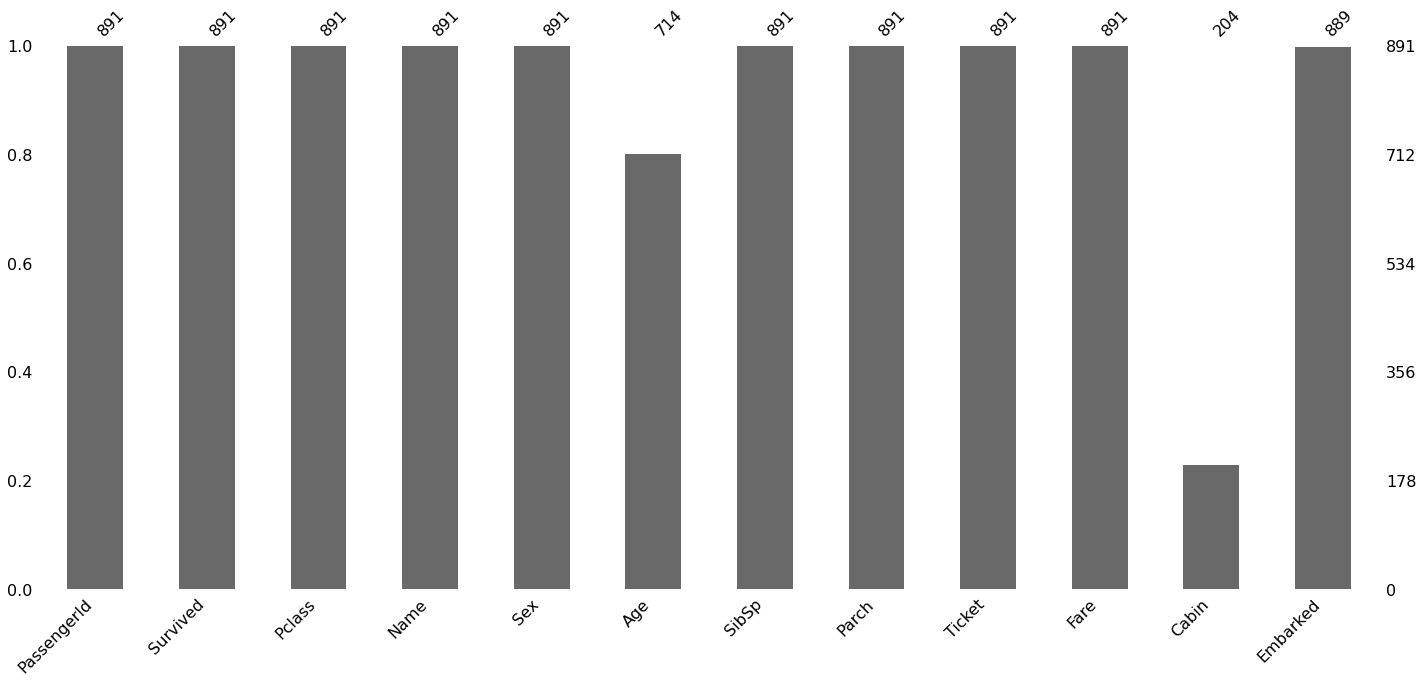

In [2]:
df = pd.read_csv('train.csv')
print("Shape: " + str(df.shape))
print()
df.head()
print()
print(df.columns)
print(df.describe(include=np.object))
print()
print(df.describe())
print()

import missingno as msno 
print(msno.bar(df))

df.tail()

### Drop it

In [3]:
to_drop = ['PassengerId', 'Ticket']

df.drop(to_drop, inplace = True, axis = 1) #or: df.drop(columns = to_drop, inplace = True)

### Exploring Columns

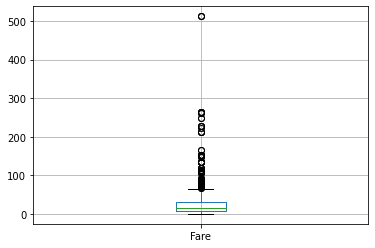

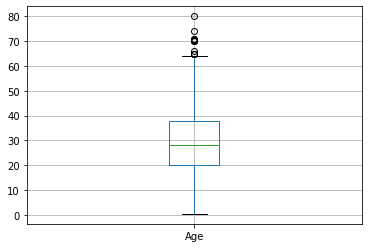

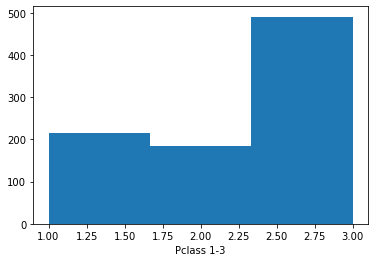

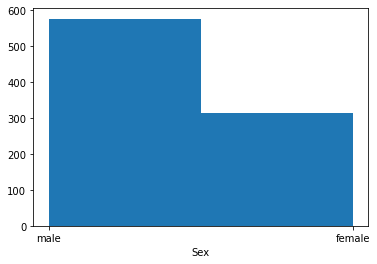

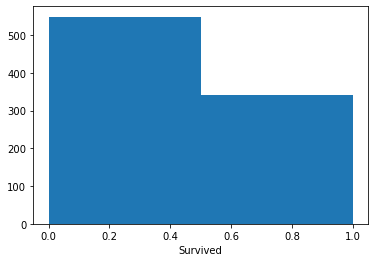

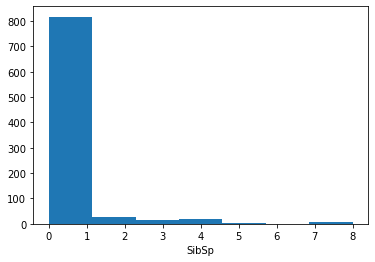

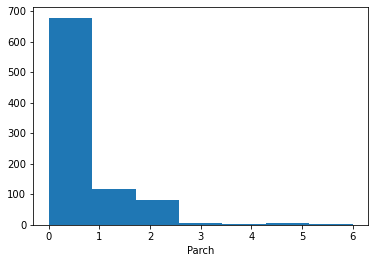

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [4]:

#print(df.head())

to_box = (['Fare', 'Age'])
to_histo = (['Pclass', 'Sex', 'Survived', 'SibSp', 'Parch'])
#boxplot1 = df.boxplot(column=to_box[0])


data1 = df[to_histo[0]];
data2 = df[to_histo[1]];
data3 = df[to_histo[2]];
data4 = df[to_histo[3]];
data5 = df[to_histo[4]];


boxplot2 = df.boxplot(column=to_box[0])
plt.show()
boxplot3 = df.boxplot(column=to_box[1])
plt.show()
#boxplot4 = df.boxplot(column=to_box[3])
#plt.show()
histo1 = plt.hist(data1,bins=len(list(set(data1))))
plt.xlabel('Pclass 1-3')
plt.show()
histo1 = plt.hist(data2,bins=len(list(set(data2))))
plt.xlabel('Sex')
plt.show()
histo1 = plt.hist(data3,bins=len(list(set(data3))))
plt.xlabel('Survived')
plt.show()
histo1 = plt.hist(data4,bins=len(list(set(data4))))
plt.xlabel('SibSp')
plt.show()
histo1 = plt.hist(data5,bins=len(list(set(data5))))
plt.xlabel('Parch')
plt.show()
plt.style.use('ggplot')

df


## Quick analysis of some columns with missing values

In [5]:
print(df['Embarked'].unique())

#index_names = df[df['Embarked'] == 'nan'].index 

#drop rows where embarked is nan
indexes = df[df['Embarked'].isna()].index

print(indexes.size)


for i in range (0,indexes.size):
    df = df.drop(indexes[i])
# drop these row indexes 
# from dataFrame 
#df = df.drop(index=indexes, inplace = True) 
#print(indexes)

#print(df['Embarked'].unique())
#histo1 = plt.hist(data6,bins=len(list(set(data6))))
#plt.xlabel('Embarked')
#plt.show()
#print(df['Embarked'].unique())
print(df['Embarked'].unique())

['S' 'C' 'Q' nan]
2
['S' 'C' 'Q']


## Cleaning Cabin

In [6]:
#unwanted_characters = ['[', ',', '-']#

#def clean_dates(item):
#    dop= str(item.loc['Name'])
#    
#    if dop == 'nan' or dop[0] == '[':
#        return np.NaN
#    
#    for character in unwanted_characters:
#        if character in dop:
#            character_index = dop.find(character)
#            dop = dop[:character_index]
#    
#    return dop

#df['Name'] = df.apply(clean_dates, axis = 1)

df.tail()


def clean_Cabin(item):
    dop= str(item.loc['Cabin'])
    
    if dop == 'nan' or dop == np.NaN:
        dop = 0
    else:
        dop = 1
    
    return dop

df['Cabin'] = df.apply(clean_Cabin, axis=1)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


## Merging Columns

In [7]:
df['familyMembers'] = df['SibSp'] + df['Parch']

to_drop = ['Parch', 'SibSp']

df.drop(to_drop, inplace = True, axis = 1)


#pub = df['Place of Publication']
#df['Place of Publication'] = np.where(pub.str.contains('London'), 'London',
#    np.where(pub.str.contains('Oxford'), 'Oxford',
#        np.where(pub.eq('Newcastle upon Tyne'),
#            'Newcastle-upon-Tyne', df['Place of Publication'])))

## Correlations (later on)

## Analysis of merged column

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,familyMembers
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,S,0


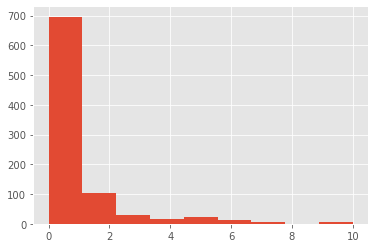

In [8]:
data = df['familyMembers'];
histo1 = plt.hist(data,bins=len(list(set(data))))

df.head()

## Cleaning Name

In [9]:
#Impute Cabin - done via encoding as cabin-known (1) or not-known (0)
#Impute Age - the easiest way is to impute the mean

df['Age'].mean()

#Encode categorical features

def clean_name(item):
    title = str(item['Name'])
        
    if ',' in title:
        title = title[title.find(','):]
        
    if '.' in title:
        title = title[:title.find('.')]
        
    title = title[2:] 
    
    
    #title = list(map(str.capitalize, title.split()))
    return title
    
df['Name'] = df.apply(clean_name, axis = 1)

df.head()
df.tail()

df['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

## Encoding Name

In [10]:
def encode_name(item):
    dop = str(item['Name'])
        
    if dop == 'Mr' or dop == 'Miss' or dop == 'Mrs':
        dop = 0
    else:
        dop = 1
    
    return dop
    
df['Name'] = df.apply(encode_name, axis = 1)

df['Name'].unique()
df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,familyMembers
0,0,3,0,male,22.0,7.2500,0,S,1
1,1,1,0,female,38.0,71.2833,1,C,1
2,1,3,0,female,26.0,7.9250,0,S,0
3,1,1,0,female,35.0,53.1000,1,S,1
4,0,3,0,male,35.0,8.0500,0,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,male,27.0,13.0000,0,S,0
887,1,1,0,female,19.0,30.0000,1,S,0
888,0,3,0,female,NaN,23.4500,0,S,3
889,1,1,0,male,26.0,30.0000,1,C,0


## Imputing Age

AxesSubplot(0.125,0.125;0.775x0.755)
29.713352080989875


,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,familyMembers
0,0,3,0,male,22.0,7.2500,0,S,1
1,1,1,0,female,38.0,71.2833,1,C,1
2,1,3,0,female,26.0,7.9250,0,S,0
3,1,1,0,female,35.0,53.1000,1,S,1
4,0,3,0,male,35.0,8.0500,0,S,0


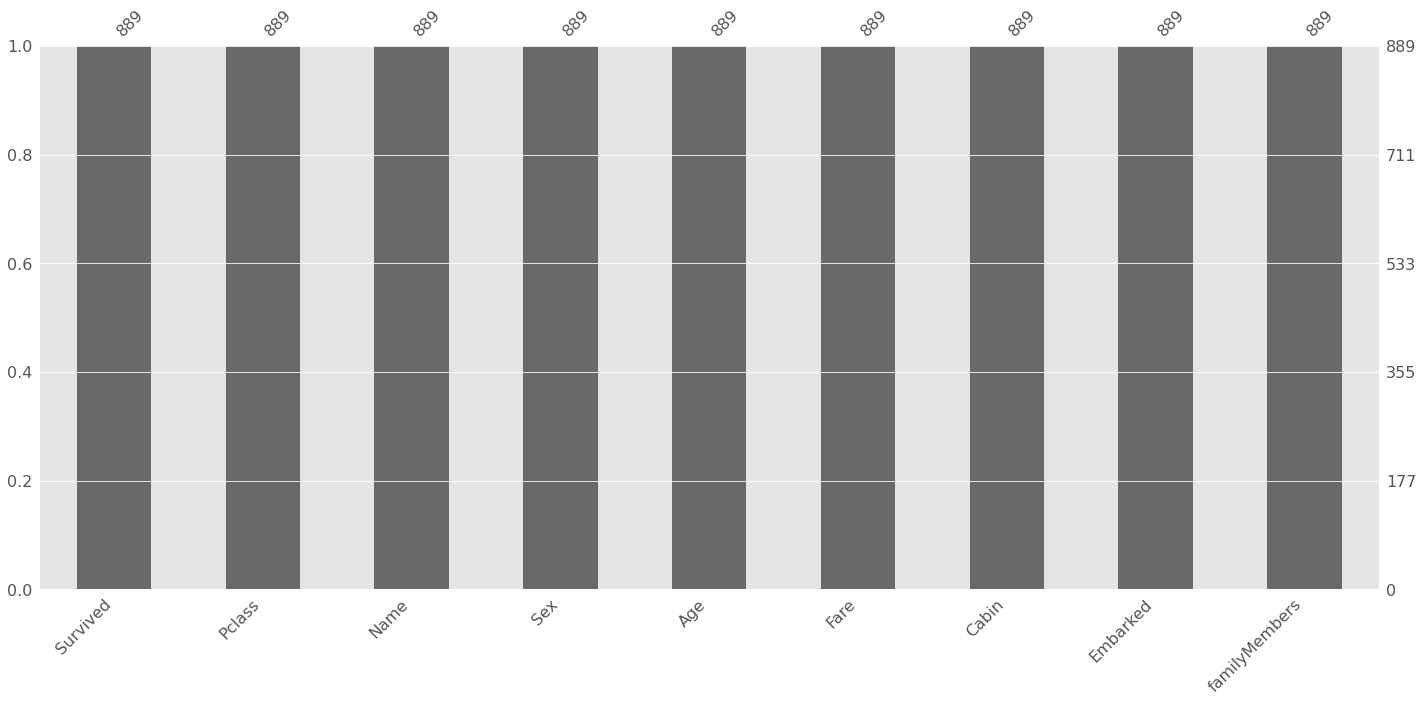

In [11]:
df.head()

def impute_Age(item):
    dop = str(item['Age'])
        
    if dop == 'nan' or dop == np.NaN:
        dop = 30;
        
    
    #title = list(map(str.capitalize, title.split()))
    return dop
    
df['Age'] = df.apply(impute_Age, axis = 1)

print(msno.bar(df))

df['Age'] = pd.to_numeric(df['Age'])

print(df['Age'].mean())
df.head()

In [12]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,familyMembers
886,0,2,1,male,27.0,13.00,0,S,0
887,1,1,0,female,19.0,30.00,1,S,0
888,0,3,0,female,30.0,23.45,0,S,3
889,1,1,0,male,26.0,30.00,1,C,0
890,0,3,0,male,32.0,7.75,0,Q,0


## Encode sex (label encoding)

In [13]:
#Encode name, sex, embarked
#Encode sex as simple binary
def encode_sex(item):
    dop = str(item['Sex'])
        
    if dop == 'male' or dop == 'Male':
        dop = 1;
    elif dop == 'female' or dop == 'Female':
        dop = 0;
    return dop
    
df['Sex'] = df.apply(encode_sex, axis = 1)

# label encoding the data 
#from sklearn.preprocessing import LabelEncoder 
  
#le = LabelEncoder() 
  
#df['Embarked']= le.fit_transform(data['Embarked']) 

#df = pd.DataFrame(mlb.fit_transform(df['Sex']),columns=mlb.classes_, index=df.index)
#print(df['Embarked'].unique())
print(df)

     Survived  Pclass  Name  Sex   Age     Fare  Cabin Embarked  familyMembers
0           0       3     0    1  22.0   7.2500      0        S              1
1           1       1     0    0  38.0  71.2833      1        C              1
2           1       3     0    0  26.0   7.9250      0        S              0
3           1       1     0    0  35.0  53.1000      1        S              1
4           0       3     0    1  35.0   8.0500      0        S              0
..        ...     ...   ...  ...   ...      ...    ...      ...            ...
886         0       2     1    1  27.0  13.0000      0        S              0
887         1       1     0    0  19.0  30.0000      1        S              0
888         0       3     0    0  30.0  23.4500      0        S              3
889         1       1     0    1  26.0  30.0000      1        C              0
890         0       3     0    1  32.0   7.7500      0        Q              0

[889 rows x 9 columns]


## Encode Embarked (One hot encoding)

In [14]:
y= pd.get_dummies(df.Embarked, prefix='E')

df = df.join(y)
#del df['Embarked']

#print(df)
df = df.drop(['Embarked'], axis = 1) 

print(df)

     Survived  Pclass  Name  Sex   Age     Fare  Cabin  familyMembers  E_C  \
0           0       3     0    1  22.0   7.2500      0              1    0   
1           1       1     0    0  38.0  71.2833      1              1    1   
2           1       3     0    0  26.0   7.9250      0              0    0   
3           1       1     0    0  35.0  53.1000      1              1    0   
4           0       3     0    1  35.0   8.0500      0              0    0   
..        ...     ...   ...  ...   ...      ...    ...            ...  ...   
886         0       2     1    1  27.0  13.0000      0              0    0   
887         1       1     0    0  19.0  30.0000      1              0    0   
888         0       3     0    0  30.0  23.4500      0              3    0   
889         1       1     0    1  26.0  30.0000      1              0    1   
890         0       3     0    1  32.0   7.7500      0              0    0   

     E_Q  E_S  
0      0    1  
1      0    0  
2      0    1  

# Final WrapUp

     Survived  Pclass  Name  Sex   Age     Fare  Cabin  familyMembers  E_C  \
0           0       3     0    1  22.0   7.2500      0              1    0   
1           1       1     0    0  38.0  71.2833      1              1    1   
2           1       3     0    0  26.0   7.9250      0              0    0   
3           1       1     0    0  35.0  53.1000      1              1    0   
4           0       3     0    1  35.0   8.0500      0              0    0   
..        ...     ...   ...  ...   ...      ...    ...            ...  ...   
886         0       2     1    1  27.0  13.0000      0              0    0   
887         1       1     0    0  19.0  30.0000      1              0    0   
888         0       3     0    0  30.0  23.4500      0              3    0   
889         1       1     0    1  26.0  30.0000      1              0    1   
890         0       3     0    1  32.0   7.7500      0              0    0   

     E_Q  E_S  
0      0    1  
1      0    0  
2      0    1  

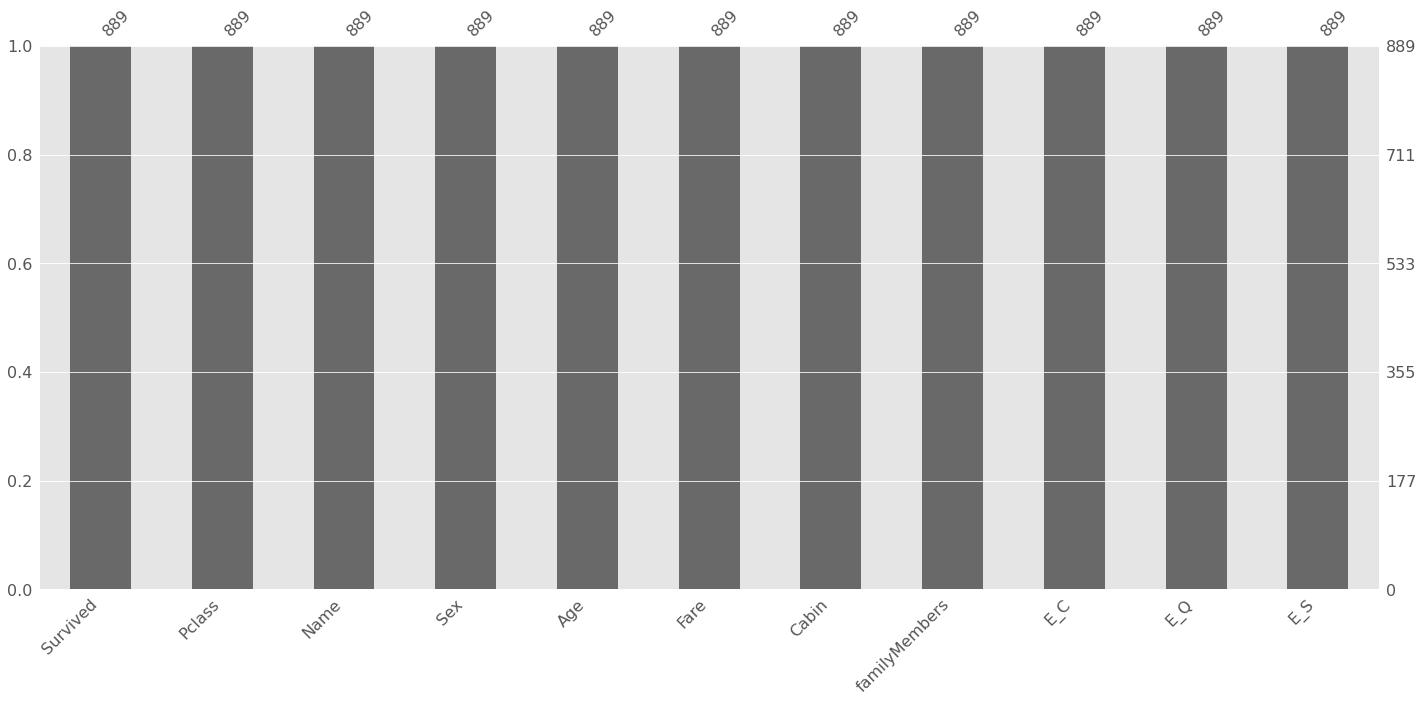

In [15]:
print(df)

print(msno.bar(df))

In [16]:
new_names = {'Name': 'Fancy',
           'Sex': 'Male',
            'Cabin': 'Known'}

df.rename(columns=new_names, inplace=1)
df.head()

,Survived,Pclass,Fancy,Male,Age,Fare,Known,familyMembers,E_C,E_Q,E_S
0,0,3,0,1,22.0,7.2500,0,1,0,0,1
1,1,1,0,0,38.0,71.2833,1,1,1,0,0
2,1,3,0,0,26.0,7.9250,0,0,0,0,1
3,1,1,0,0,35.0,53.1000,1,1,0,0,1
4,0,3,0,1,35.0,8.0500,0,0,0,0,1


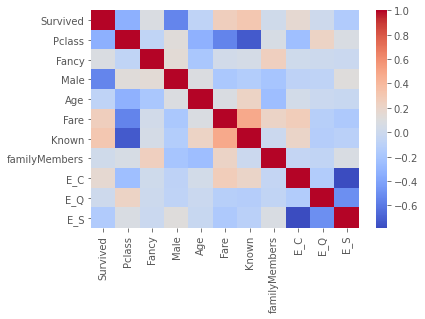

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

#corr2 = df2.corr()
correlations = df.corr()
#correlations
#sns.heatmap(corr2)
sns.heatmap(correlations,annot=False, cmap='coolwarm')
plt.show()

In [22]:
df.to_csv('goodCleaned.csv')